In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import  numpy as np
import pandas as pd
import pickle

In [13]:
    with open("rendered_wano.yml") as file:
        wano_file = yaml.full_load(file)

    geom_filename = wano_file['Geometries']
    neurons=wano_file['Neurons']
    act_funct=wano_file['Activation function']
    layerss=wano_file['Hidden Layers']
    CO_distance=wano_file['Cut-off distance']
    lr=wano_file['Learning rate']


    data_energy = wano_file['Energies'] 
    data_set = pd.read_csv('rearranged-table.csv')  

    ref_dftb_file = wano_file['Ref-Energy-DFTB'] 
    ref_dftb = pd.read_csv('Reference_table.csv')  

    ref_orca_file = wano_file['Ref-Energy-DFT'] 
    ref_orca = pd.read_csv('Reference_table.csv')  



    data_set['Delta'] = (data_set['orca_energy'] - data_set['dftb_energy'] + ref_dftb['dftb_energy'].sum() - ref_orca['orca_energy'].sum())*627.5

In [100]:
len(data_set)*0.8

80.0

Text(0.5, 1.0, 'Dataset histogram')

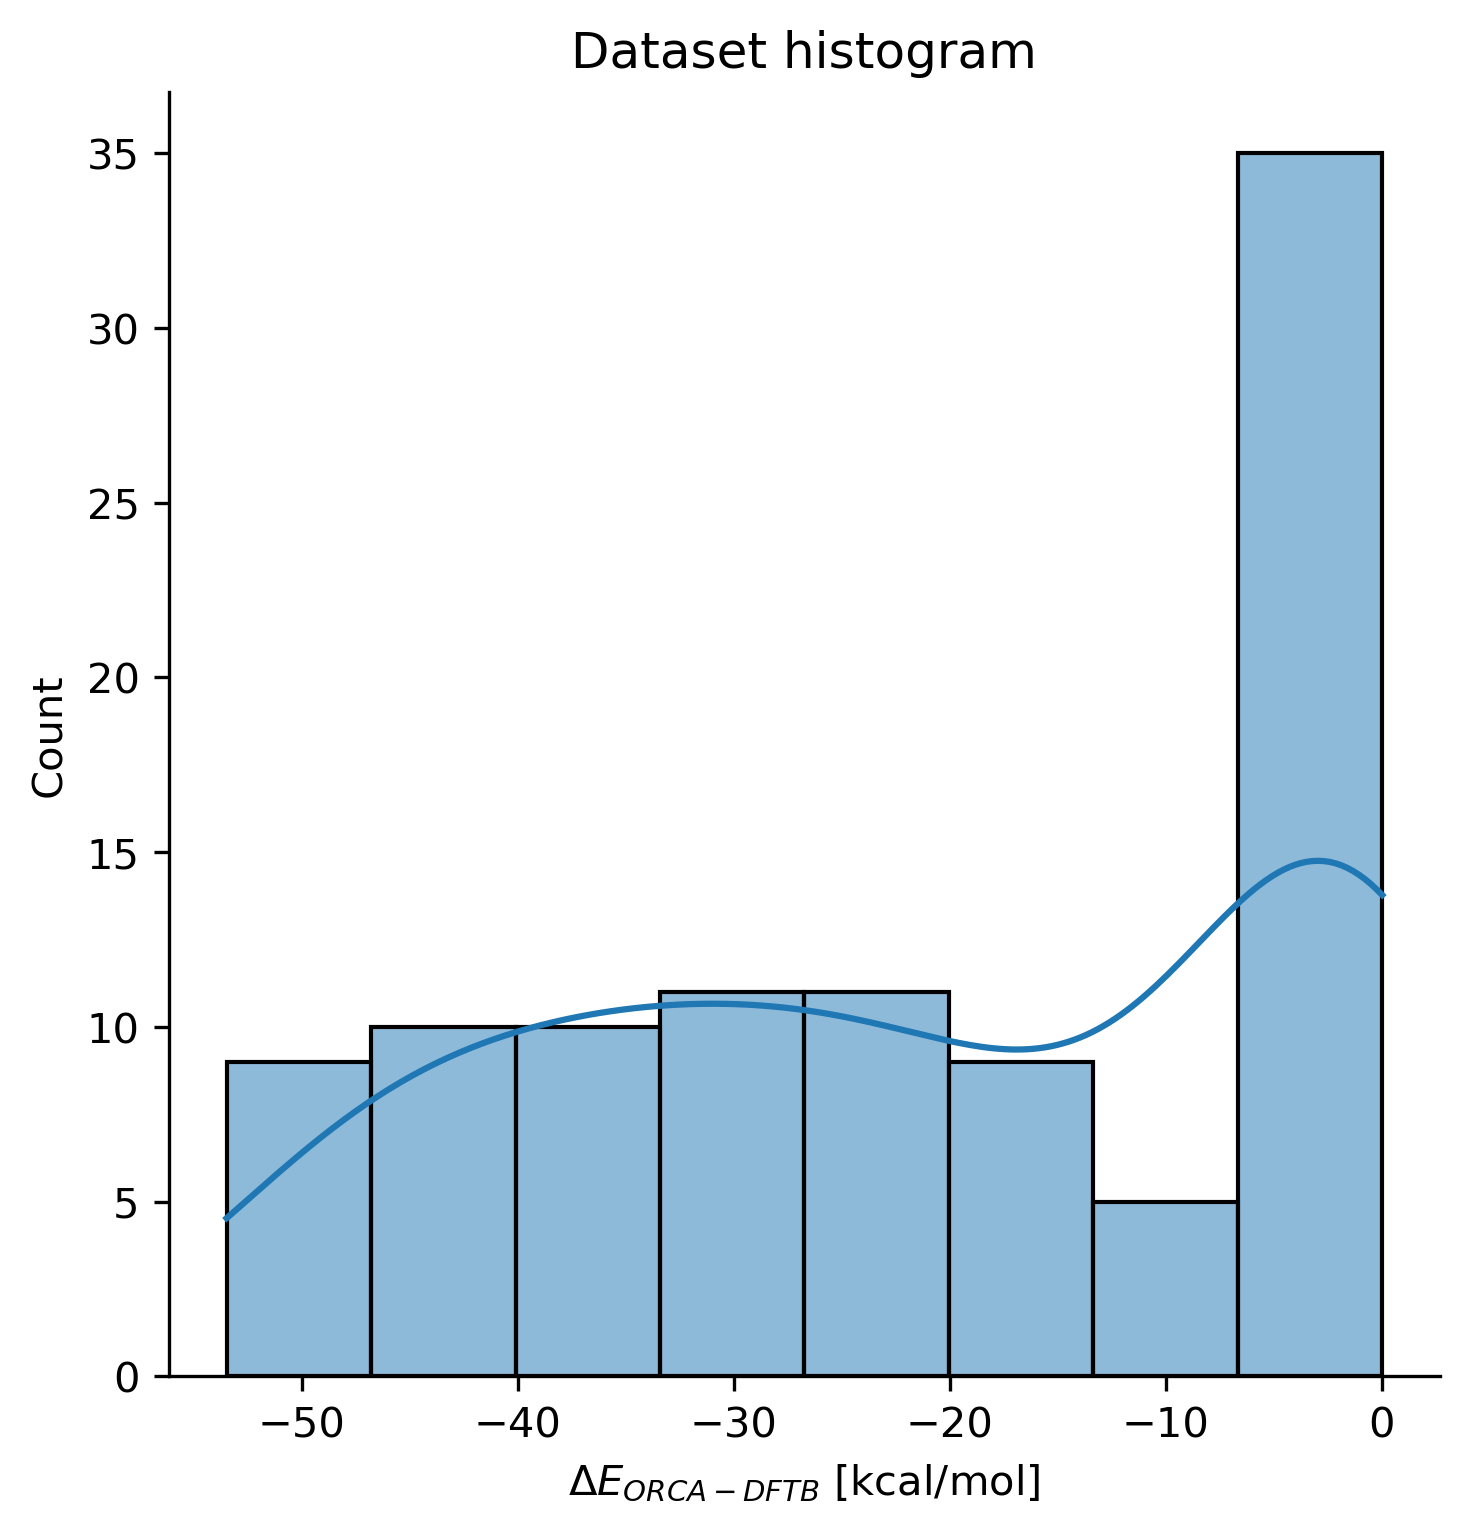

In [116]:
sns.displot(data=data_set['Delta'], kde=True)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':300})
plt.xlabel('$\Delta E_{ORCA-DFTB}$ [kcal/mol]')
plt.title('Dataset histogram')

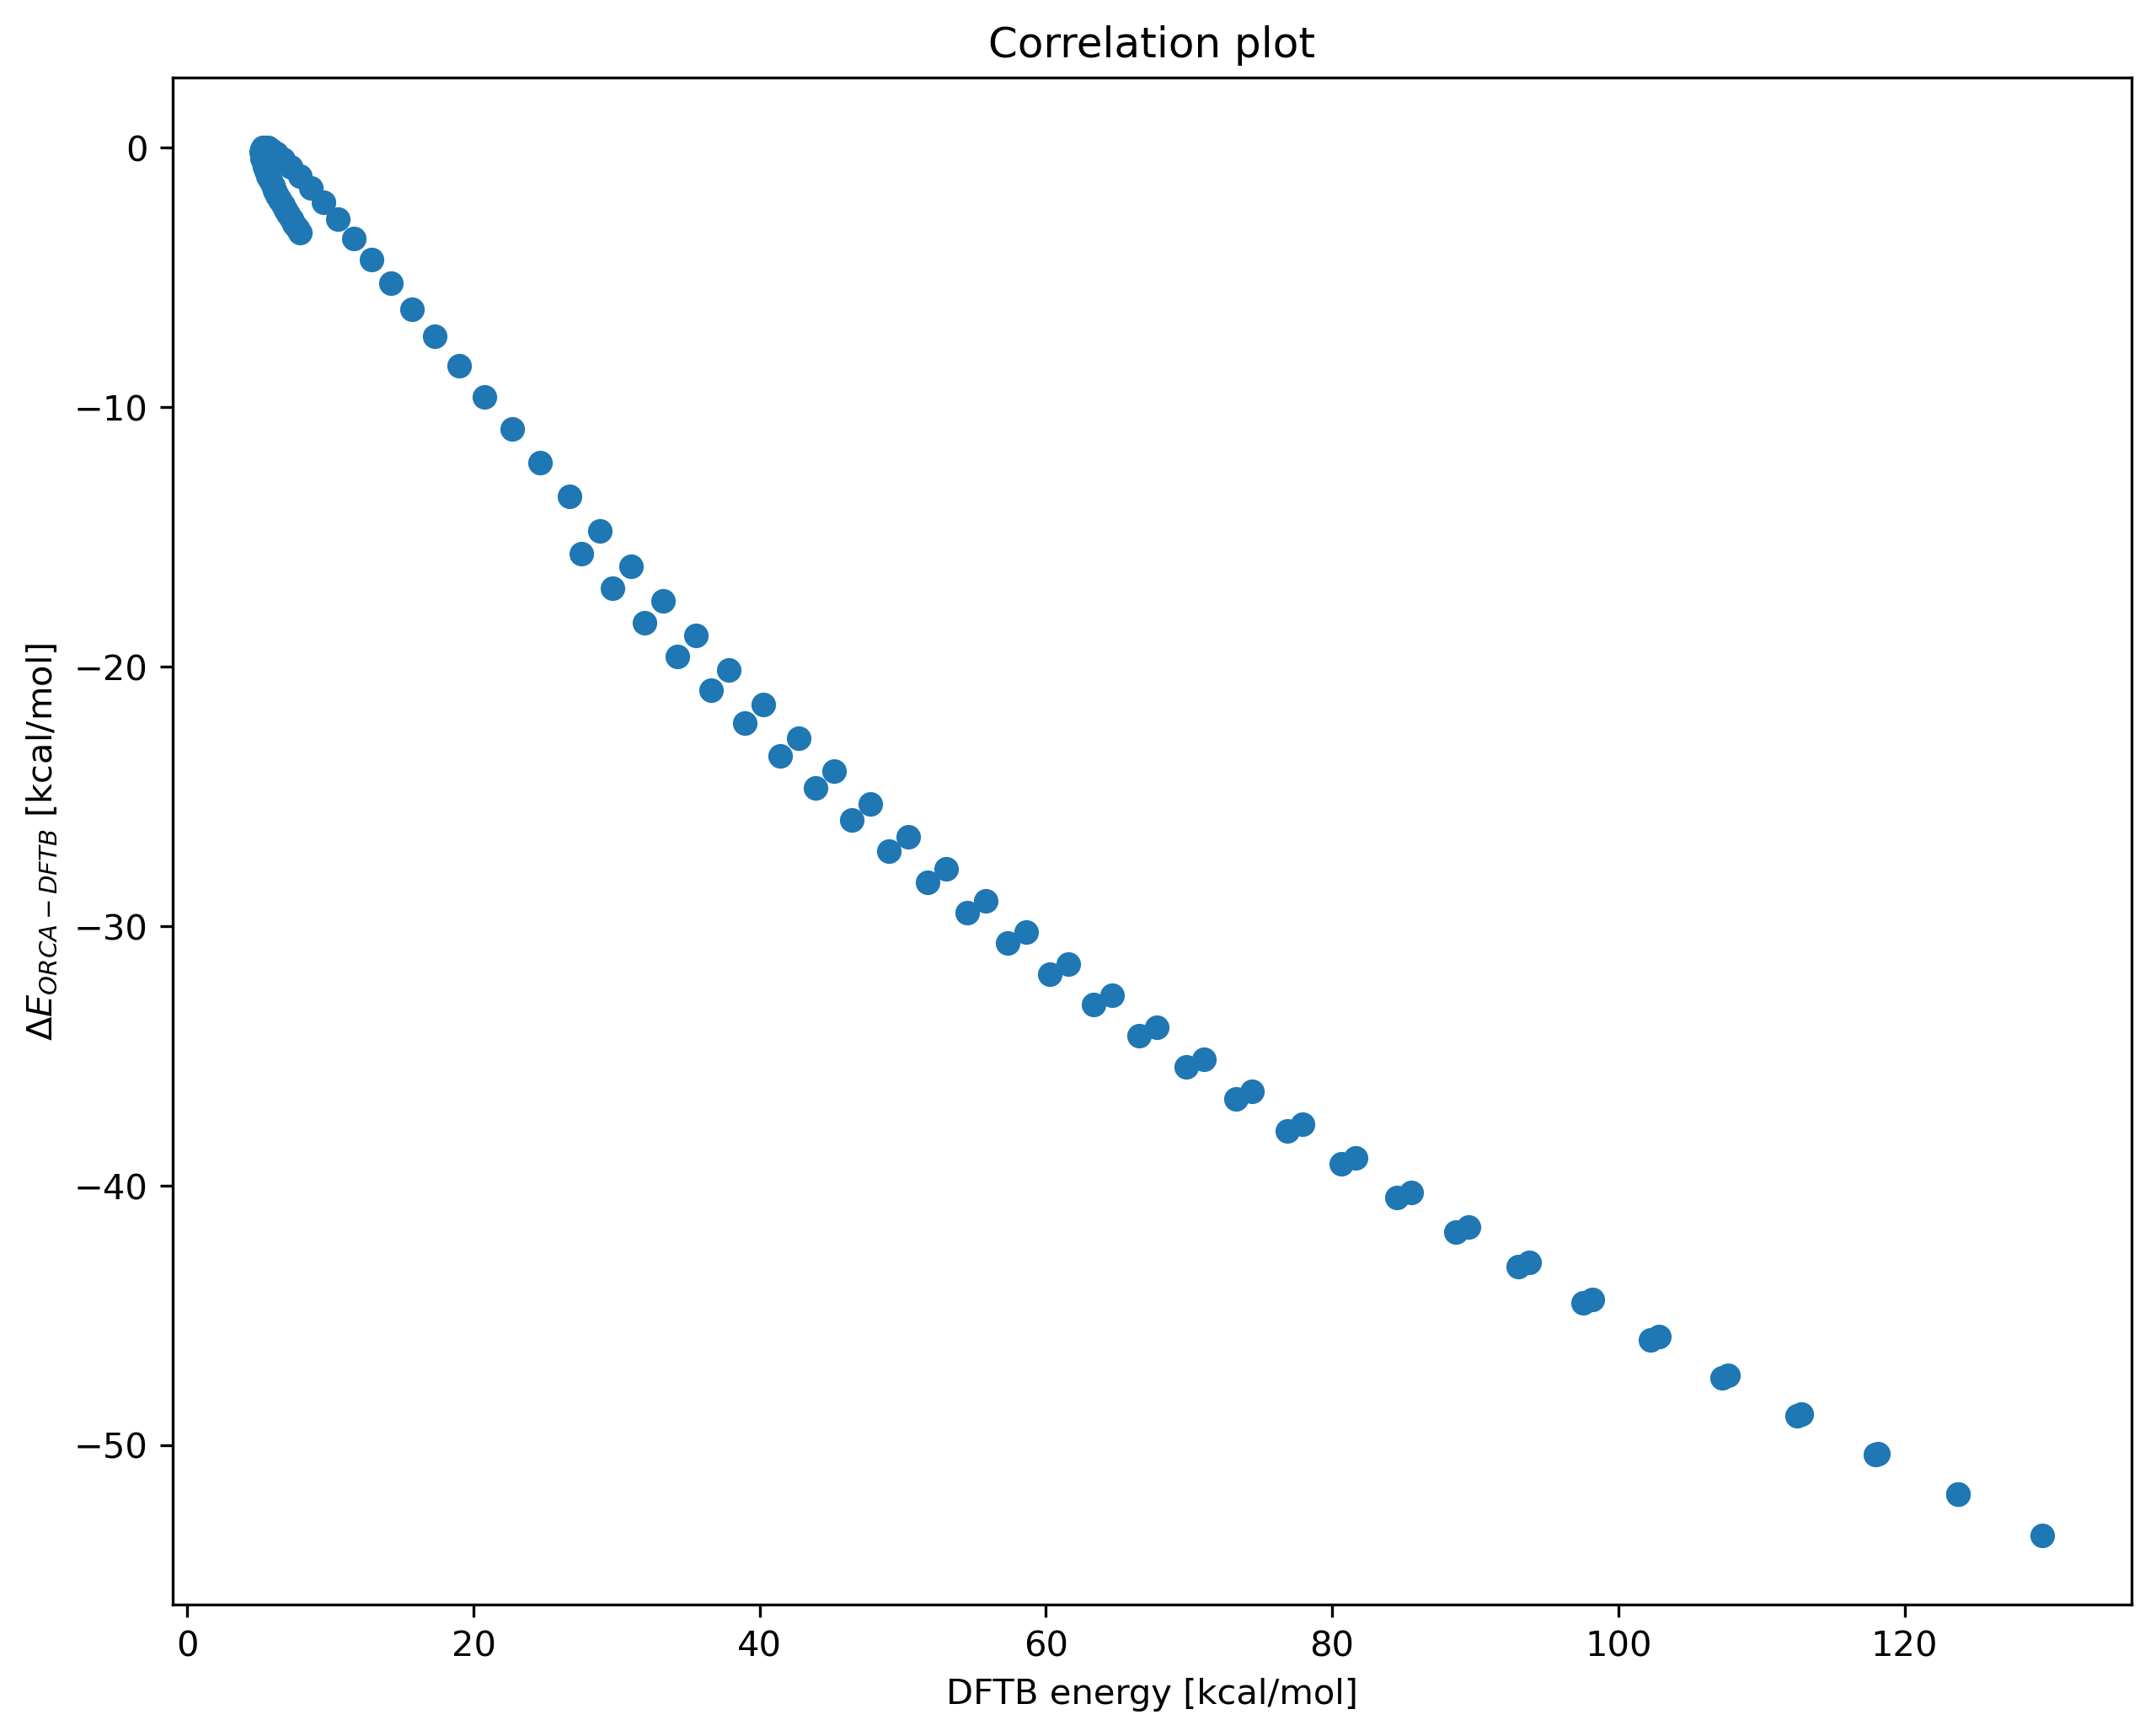

In [44]:
plt.scatter(((data_set['dftb_energy']-ref_dftb['dftb_energy'].sum())*627.5), data_set['Delta'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':300})
plt.title('Correlation plot')
plt.xlabel('DFTB energy [kcal/mol]')
plt.ylabel('$\Delta E_{ORCA-DFTB}$ [kcal/mol]')
plt.show()


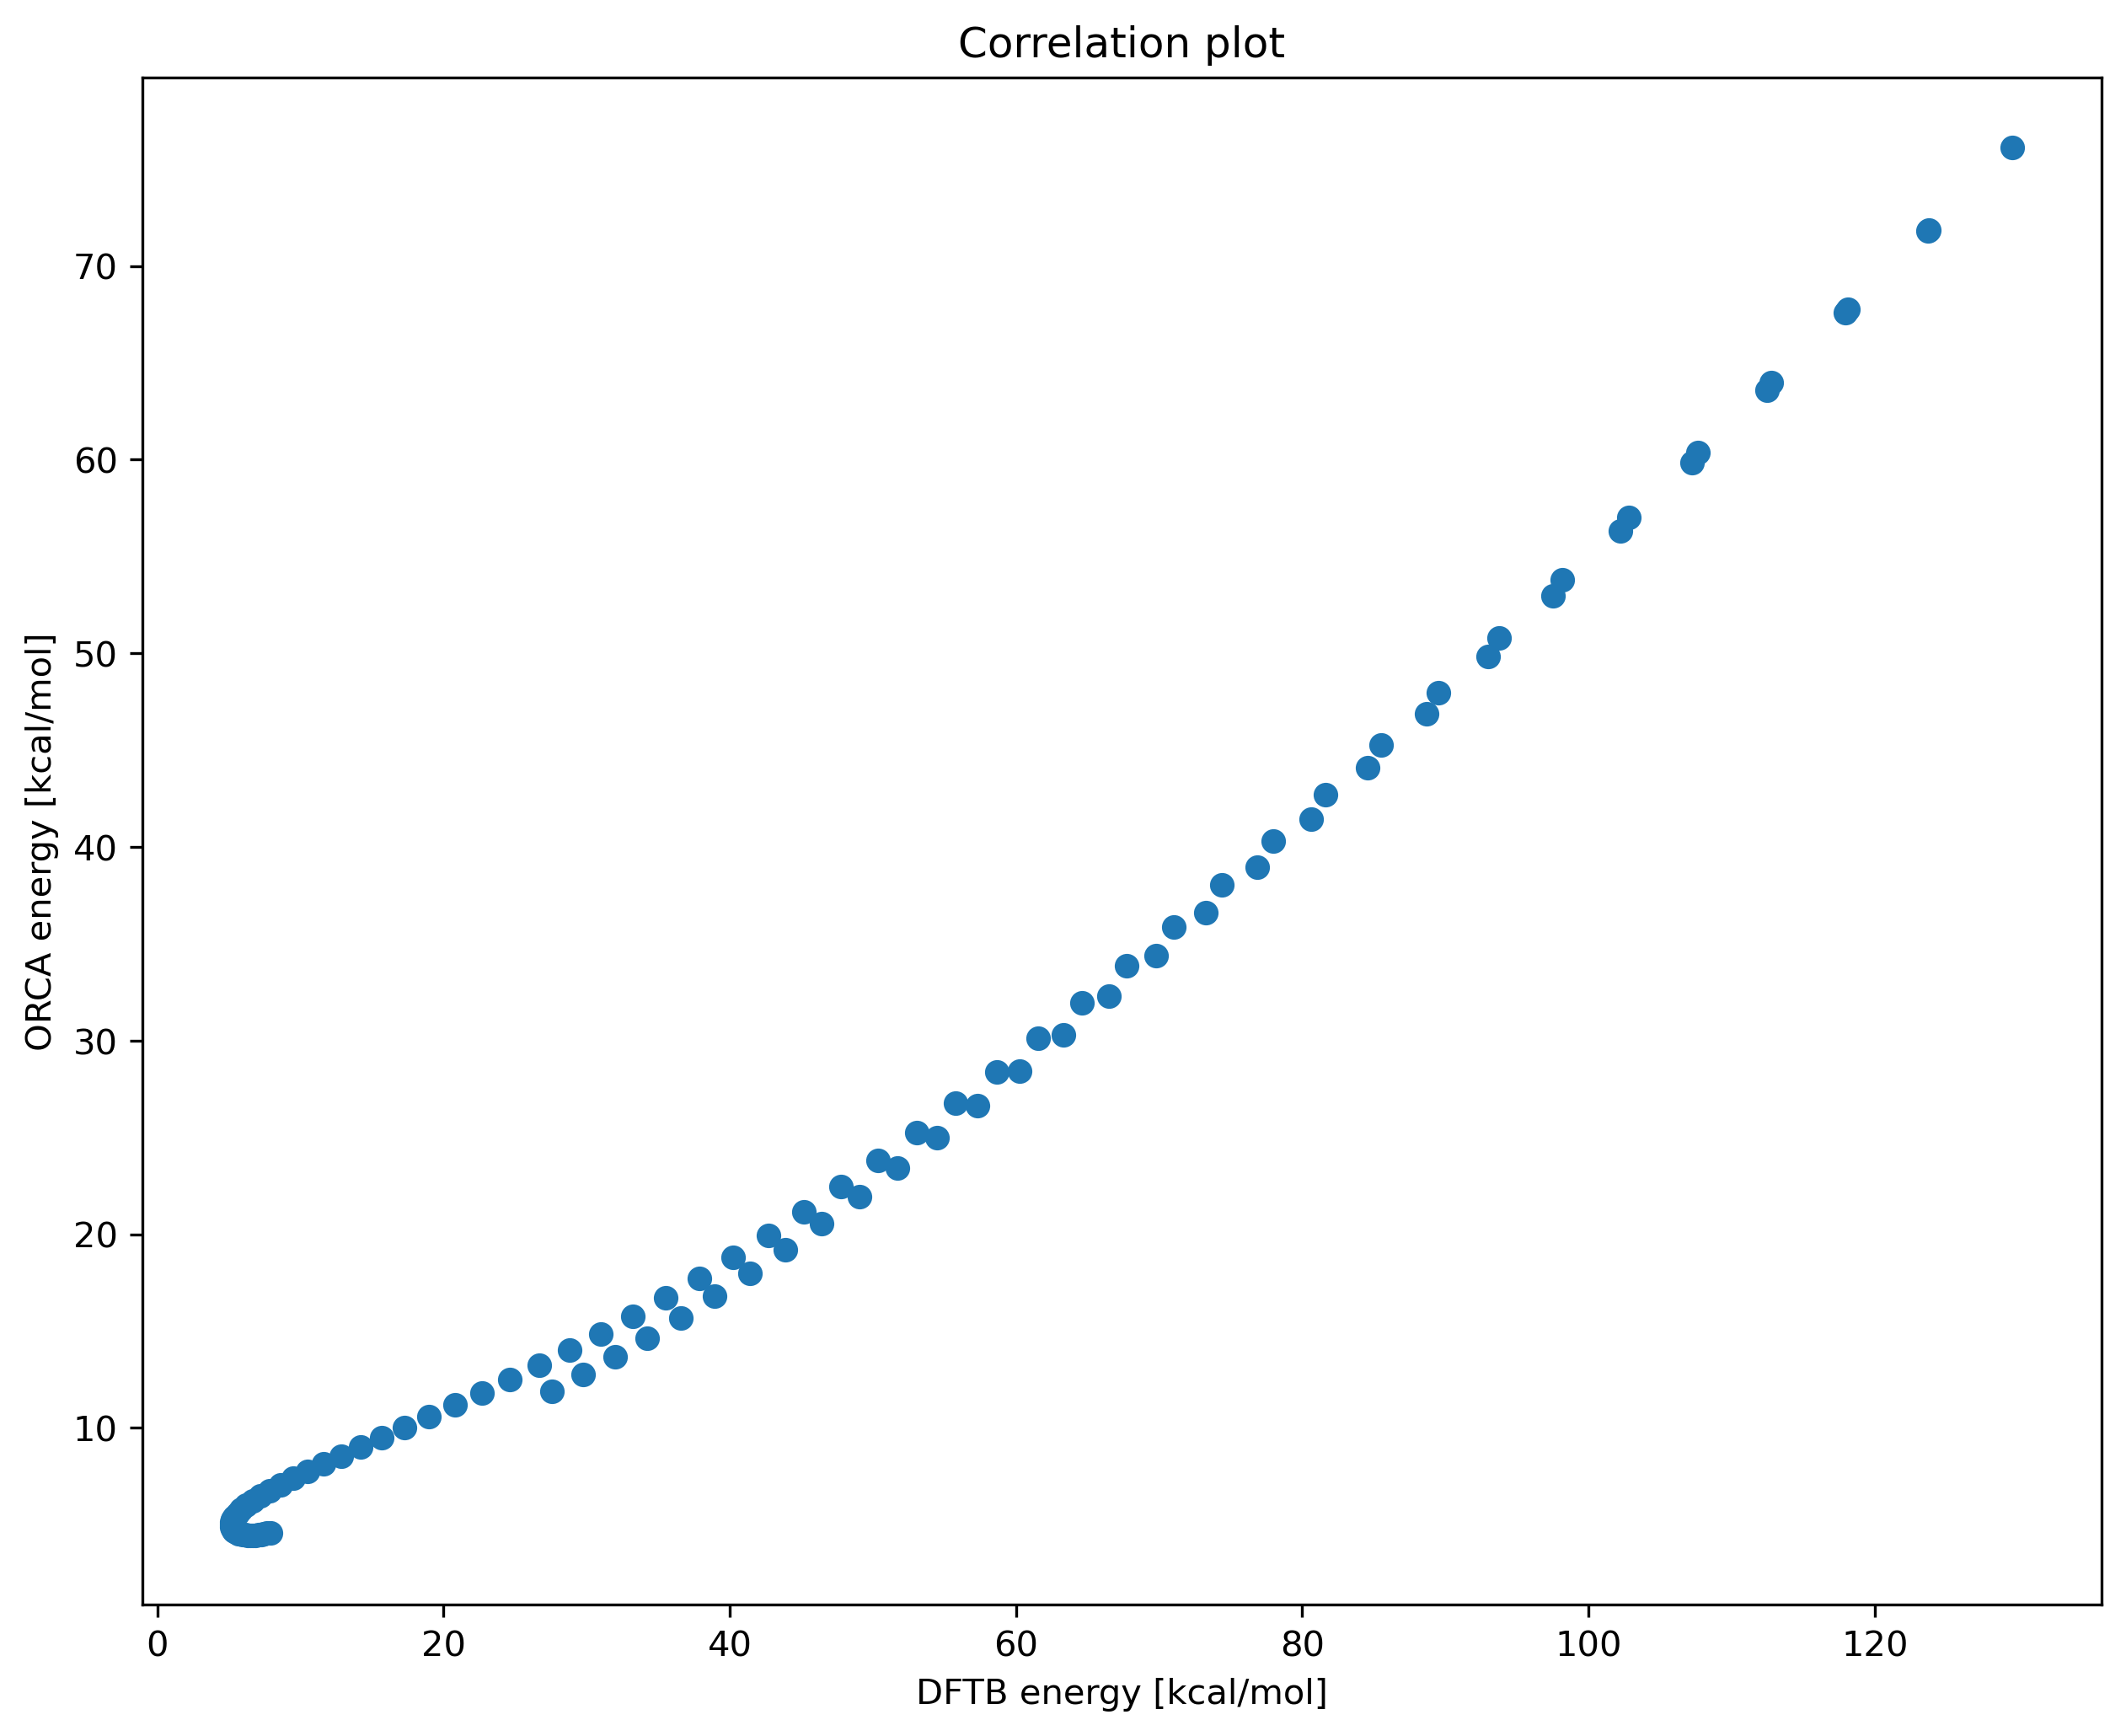

In [45]:
plt.scatter(((data_set['dftb_energy']-ref_dftb['dftb_energy'].sum())*627.5), (data_set['orca_energy']-ref_dftb['orca_energy'].sum())*627.5)
#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':300})
plt.title('Correlation plot')
plt.xlabel('DFTB energy [kcal/mol]')
plt.ylabel('ORCA energy [kcal/mol]')
plt.show()

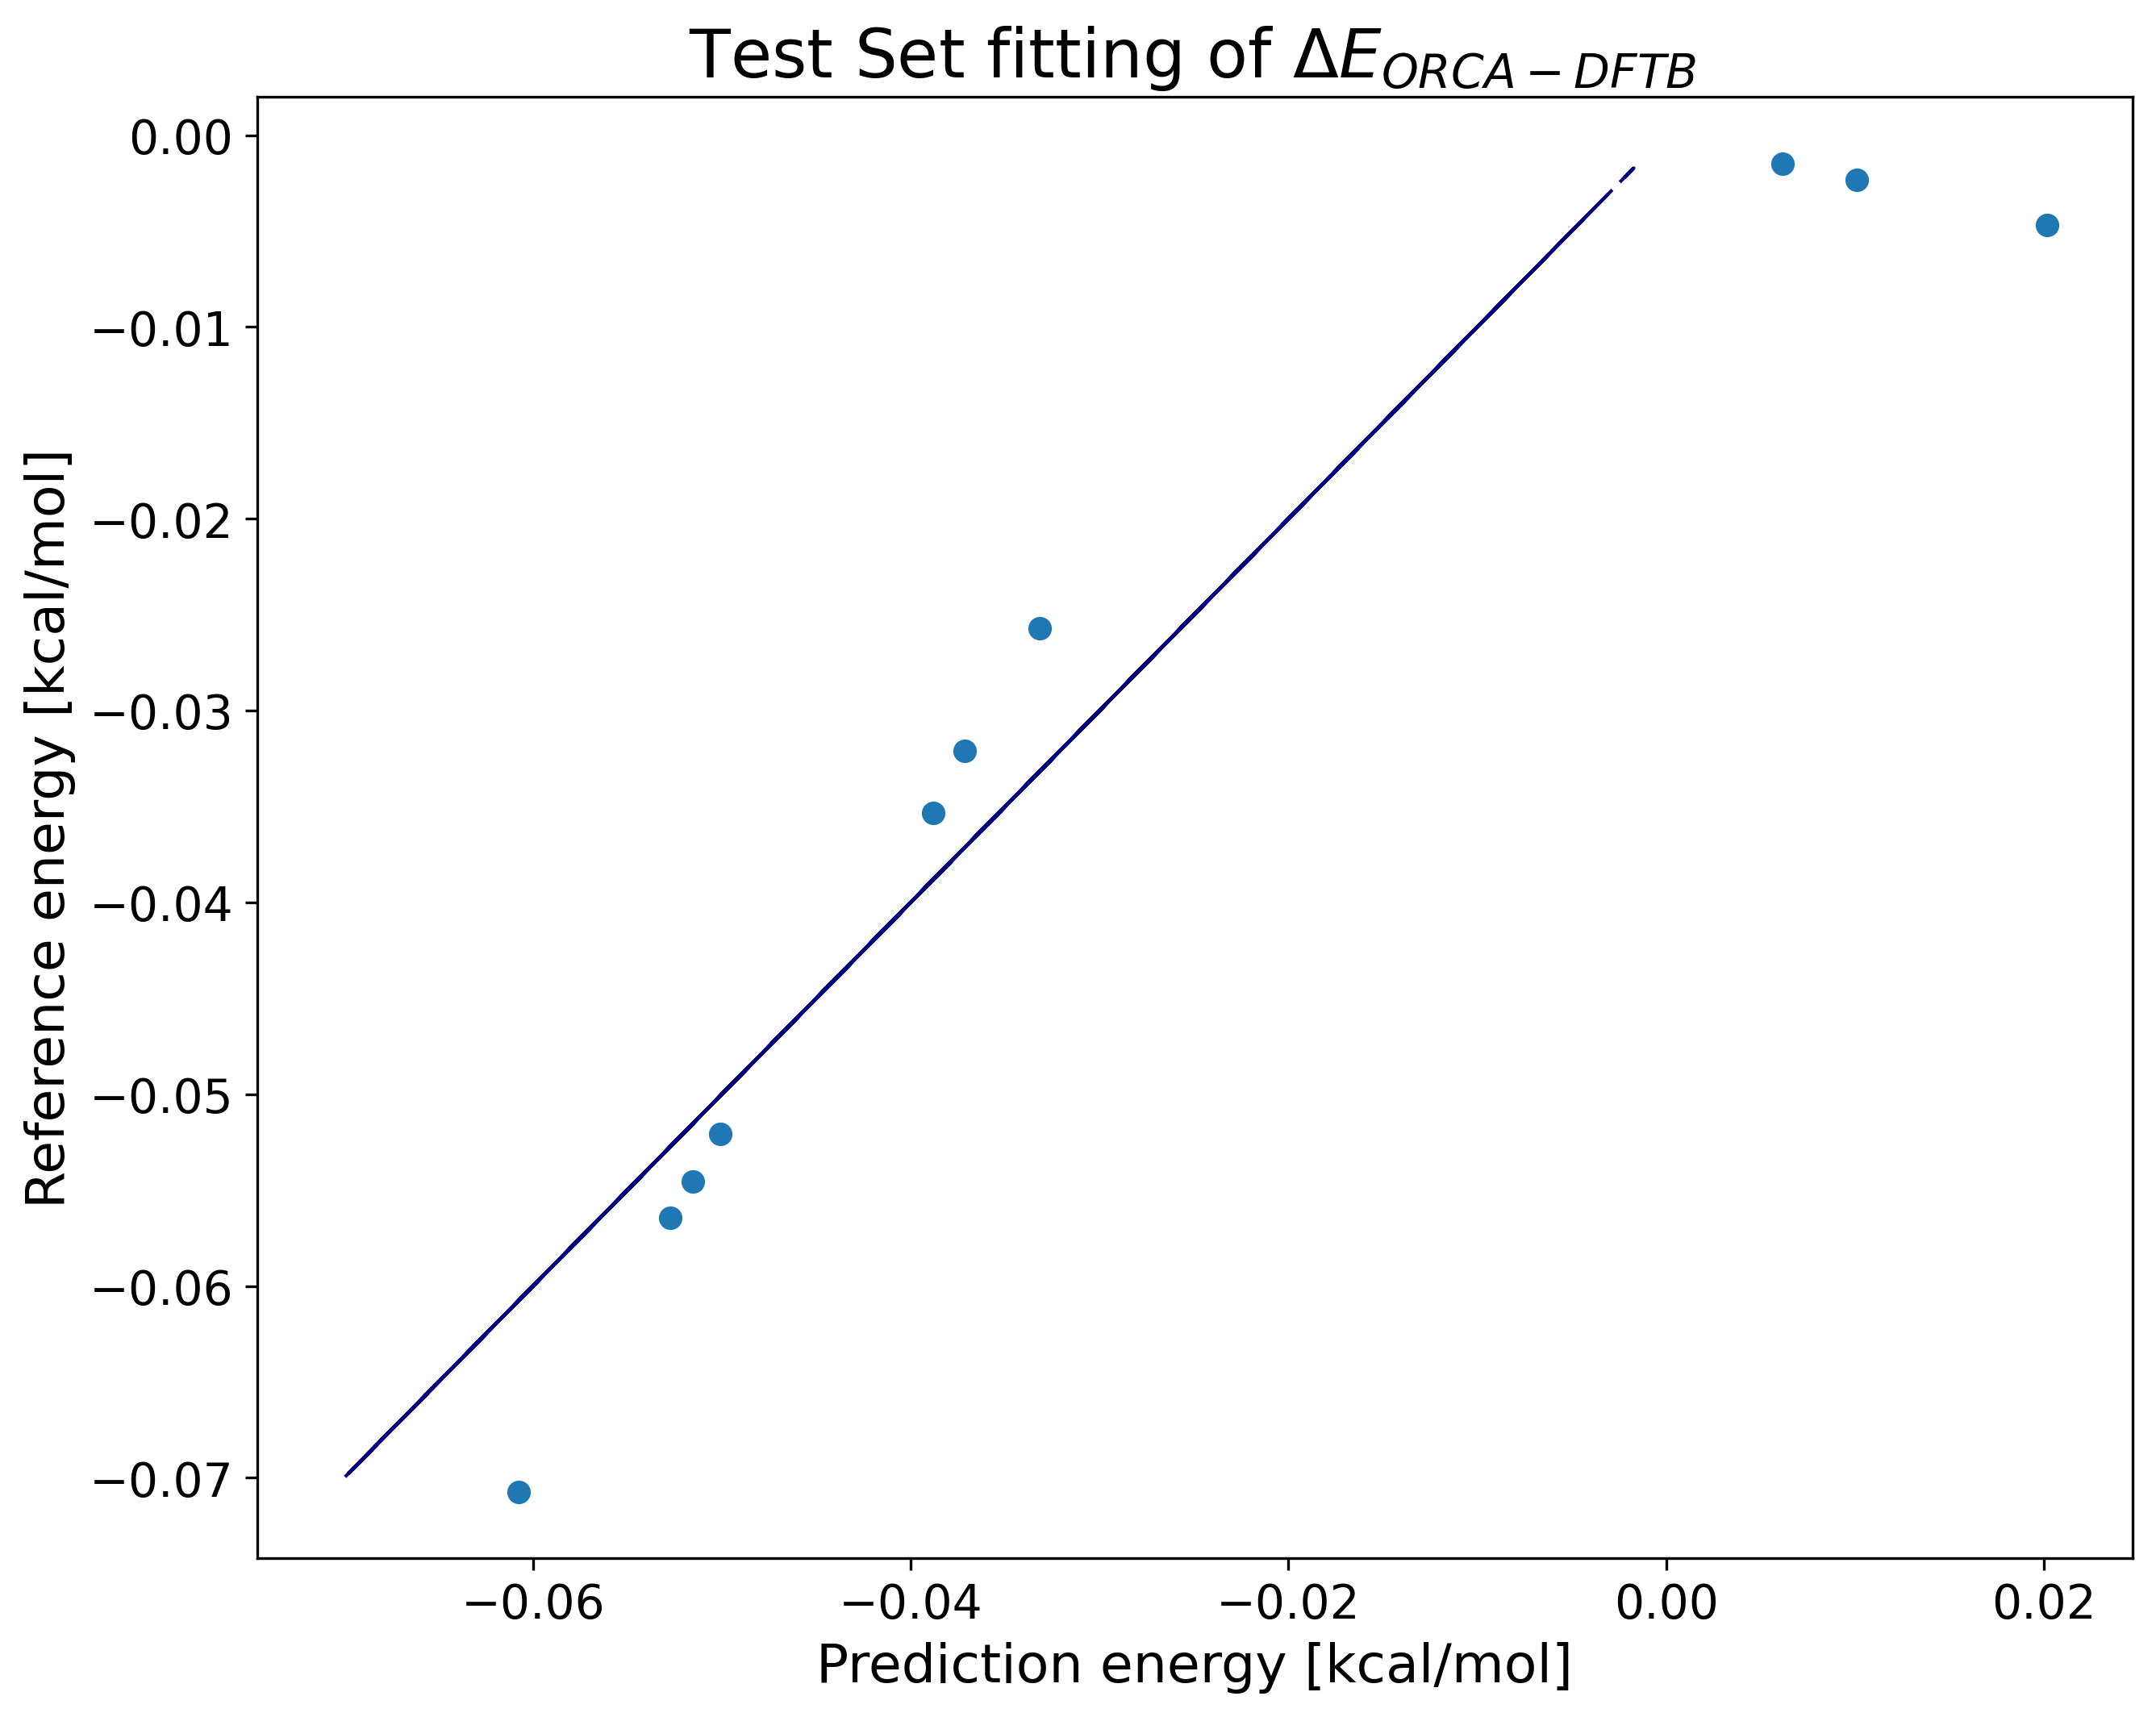

In [84]:
# Scatter plot of predicted and true values of energies in the test set
y_pred=pickle.load( open( "y_pred.pkl", "rb" ))
y_obs=pickle.load( open( "y_obs.pkl", "rb" ))
x2 = pd.Series(pickle.load( open( "y_pred.pkl", "rb" ) ), name="Predicted")
x1 = pd.Series(pickle.load( open( "y_obs.pkl", "rb" ) ), name="Observed")
x = np.random.uniform(min(x1),max(x1),size=100)
plt.plot(x, x, dashes=[10, 5, 20, 5],color='navy',linewidth=1)
plt.scatter(x2, x1)
plt.title('Test Set fitting of $\Delta E_{ORCA-DFTB}$ ', fontsize=20)
plt.ylabel('Reference energy [kcal/mol]', fontsize = 16)
plt.xlabel('Prediction energy [kcal/mol]',fontsize = 16)
plt.tick_params(axis='both', labelsize=14)

In [110]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error        
err_test = np.sqrt(mean_squared_error(y_pred, y_obs))
import yaml

fname = "info.yaml"
thisdict = {
  "RMSE": '%.5f' % err_test,
  "DFTB reference energy": '%.5f kcal/mol'%((ref_dftb['dftb_energy'].sum())*627.5),
  "ORCA reference energy": '%.5f kcal/mol'%((ref_orca['orca_energy'].sum())*627.5)
}

with open(fname, 'w') as yaml_file:
    yaml_file.write( yaml.dump(thisdict, default_flow_style=False))